In [ ]:
import pandas as pd
df = pd.read_csv('RetailSales.csv')
df.head

<bound method NDFrame.head of     Invoice_ID  Customer_ID Product_Name     Category  Quantity   Price  \
0          I-1           35       Tablet  Electronics         7  360.68   
1          I-2           34         Rice    Groceries         6  128.33   
2          I-3           97     Yoga Mat       Sports         2  515.10   
3          I-4            2         Eggs    Groceries         1  733.72   
4          I-5          100    Dumbbells       Sports         2  815.41   
..         ...          ...          ...          ...       ...     ...   
995      I-996           76        Jeans     Clothing         3  527.63   
996      I-997           41        Jeans     Clothing        10  744.78   
997      I-998           81     Curtains   Home Decor         9  379.80   
998      I-999           30       Tablet  Electronics         4   64.06   
999     I-1000           46     Curtains   Home Decor         2  745.06   

     Total_Sales        Date  
0        2524.76  18-03-2024  
1         769.98  26-02-2024  
2        1030.20  08-12-2024  
3         733.72  28-02-2024  
4        1630.82  25-02-2024  
..           ...         ...  
995      1582.89  17-09-2024  
996      7447.80  20-09-2024  
997      3418.20  25-09-2024  
998       256.24  03-06-2024  
999      1490.12  25-03-2024  

[1000 rows x 8 columns]>

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['Invoice_ID', 'Customer_ID', 'Product_Name', 'Category', 'Quantity',
       'Price', 'Total_Sales', 'Date'],
      dtype='object')

In [ ]:
## check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Invoice_ID,0
Customer_ID,0
Product_Name,0
Category,0
Quantity,0
Price,0
Total_Sales,0
Date,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice_ID    1000 non-null   object        
 1   Customer_ID   1000 non-null   int64         
 2   Product_Name  1000 non-null   object        
 3   Category      1000 non-null   object        
 4   Quantity      1000 non-null   int64         
 5   Price         1000 non-null   float64       
 6   Total_Sales   1000 non-null   float64       
 7   Date          1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 62.6+ KB


/tmp/ipython-input-2345423161.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
## creating a month column
df['Month'] = df['Date'].dt.to_period('M')
df.head()

,Invoice_ID,Customer_ID,Product_Name,Category,Quantity,Price,Total_Sales,Date,Month
0,I-1,35,Tablet,Electronics,7,360.68,2524.76,2024-03-18,2024-03
1,I-2,34,Rice,Groceries,6,128.33,769.98,2024-02-26,2024-02
2,I-3,97,Yoga Mat,Sports,2,515.10,1030.20,2024-12-08,2024-12
3,I-4,2,Eggs,Groceries,1,733.72,733.72,2024-02-28,2024-02
4,I-5,100,Dumbbells,Sports,2,815.41,1630.82,2024-02-25,2024-02


In [ ]:
## Monthly Sales Trend
df.groupby('Month')['Total_Sales'].sum()

,Total_Sales
Month,
2023-12,31413.79
2024-01,266885.17
2024-02,208006.03
2024-03,211919.18
2024-04,222534.37
2024-05,198478.75
2024-06,159229.36
2024-07,225786.74
2024-08,219086.79


In [ ]:
## Top 5 Products by Total Sales
df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head(5)

,Total_Sales
Product_Name,
Headphones,162273.02
Jeans,144115.71
Eggs,140053.72
Rice,137759.99
Wall Art,129214.02


In [ ]:
## To 5 Product by Quantity Sold
df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(5)


,Quantity
Product_Name,
Jeans,280
Wall Art,276
Headphones,270
Bicycle,261
Eggs,257


In [ ]:
## Category- Wise Sales
df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)


,Total_Sales
Category,
Clothing,600020.64
Groceries,584065.33
Electronics,554400.20
Sports,538967.61
Home Decor,476812.82


In [ ]:
## Group Sales by Month
Monthly_Sales = df.groupby('Month')['Total_Sales'].sum().sort_values()
Monthly_Sales

,Total_Sales
Month,
2023-12,31413.79
2024-06,159229.36
2024-05,198478.75
2024-02,208006.03
2024-03,211919.18
2024-08,219086.79
2024-04,222534.37
2024-07,225786.74
2024-11,232718.77


<Axes: xlabel='Month'>

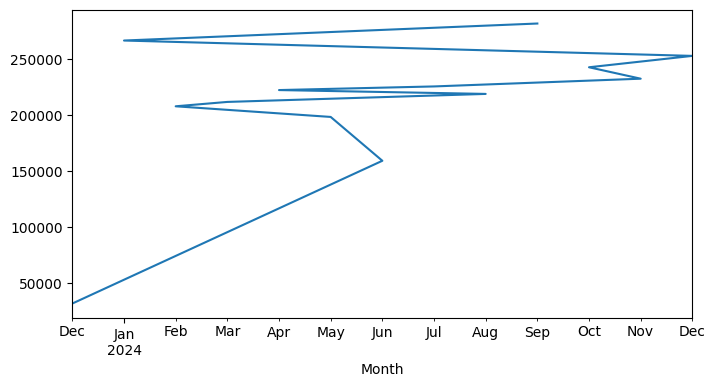

In [ ]:
## Plot Monthly Sales
Monthly_Sales.plot(kind='line', figsize=(8,4))

In [ ]:
## Customer Insights
df.groupby('Customer_ID')['Total_Sales'].sum().sort_values(ascending=False).head(5)


,Total_Sales
Customer_ID,
94,57434.76
10,50909.79
15,47194.50
95,46172.90
87,46018.68
